# Part 4 | Clustering

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Seção 21 | K-means Clustering

In [2]:
# Importing the dataset

dss21 = pd.read_csv('C:\\Users\\rafae\\Dropbox\\Data_Science\\Cursos\\A_to_Z\\Part 4 - Clustering\\Section 24 - K-Means Clustering\\Mall_Customers.csv')

In [3]:
dss21.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dss21.iloc[:, [3, 4]].values

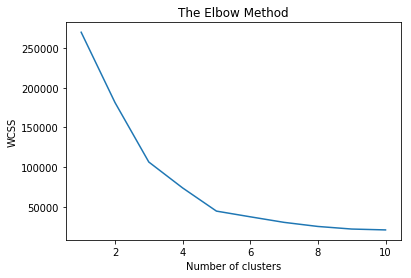

In [5]:
# Using the Elbow Method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Applying K-Means to the mall dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

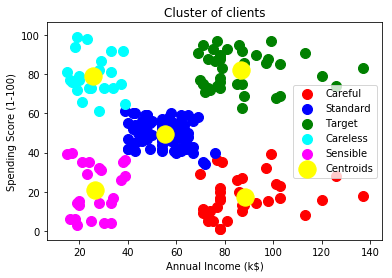

In [7]:
# Visualising the clusters

plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans ==2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans ==3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans ==4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Seção 22 | Hierarchical Clustering

In [8]:
dss22 = pd.read_csv('C:\\Users\\rafae\\Dropbox\\Data_Science\\Cursos\\A_to_Z\\Part 4 - Clustering\\Section 25 - Hierarchical Clustering\\Mall_Customers.csv')

In [9]:
dss22.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X = dss21.iloc[:, [3, 4]].values

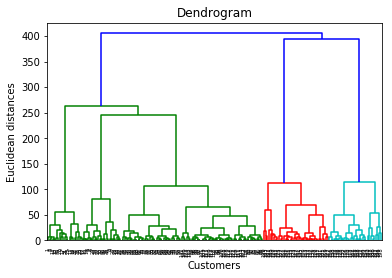

In [11]:
# Using the Dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [12]:
# Fitting hierarchical clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

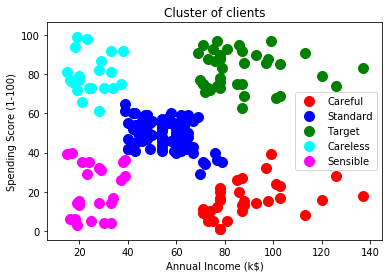

In [13]:
# Visualising the clusters

plt.scatter(X[y_hc ==0, 0], X[y_hc ==0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc ==1, 0], X[y_hc ==1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc ==2, 0], X[y_hc ==2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc ==3, 0], X[y_hc ==3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc ==4, 0], X[y_hc ==4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Cluster of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()